# Hyperparameter tuning of MEM

Here we evalate randomly selected sets of hyperparameters of the MEM model in terms of the **out of sample log-likelihood predictive density (LLPD$_o$)**. 

Steps of hyperparameter tuning steps
 + Specify range of $\lambda, \vartheta, k$  and then randomly choose 50 setting of hyperparameters for tuning.
 + Use the python script **hyperparameter_tuning_fit.py** to compute variational posteriors for each of the selected settings. 
 + Each of the settings are evaluated for 5 random initializations to account for non-convexity (sensitivity to initialization).
 + Evaluate each of the setting based on **LLPD$_o$**.
 
#### Hyperparameters range 
+ $\lambda$ : equispaced on the log scale in the range of **[0.01 to 3000]**
+ $ \vartheta$ : range **[0.03125, 0.5]**
+ k : **[ 10, 16,  30, 50, 80, 100, 150, 200,500]**

#### Hyperparameters tuning script 
With 5 random initializtion of each of the 50 selected hyoerparameter settings, we have perform 250 total simulation study in the hyperparameter tuning steps. The python script mentioned below save command for each of 250 settings in the file **"mem_hyperparam_tuning"**.

A line in the file **mem_hyperparam_tuning** calls the python script **hyperparameter_tuning_fit.py** for a given choice of the parameters. 

*module purge ; module load slurm gcc python3 ; OMP_NUM_THREADS=1 python3 hyperparameter_tuning_fit.py 150 1.0 0.289 0.22196 0.1 0 200 0 > logfile/1.log 2>&1*

Input parameters for a setting includes **latent rank (k), setting seed,  $\lambda$,  $\vartheta$, test sample proportion, settings unique ID, variational posterior sample size and sub-settings unique ID (0-4)**. 

#### Variational posterior estimation 
We run the script on server using the command:
*sbatch -N [#node] -p [#partition] disBatch.py -t [#task on each node] [script_file]*

Example: *sbatch -N 10 -p ccm disBatch.py -t 25 mem_hyperparam_tuning*



#### Model output analysis
Evaluate each of the settings based on the $LLPD_o$. Let us consider out model output is saved in the folder *HPcheck*. We load each output file and compute the $LLPD_o$. We select the best setting for further analysis. 

In [1]:
## Load all the required python module for the analysis 
import glob 
import pickle
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hiplot as hip
import os 
import copy 
%matplotlib inline

# 1. Read config_mode.txt
config_file = "config_mode.txt"
if os.path.exists(config_file):
    with open(config_file, "r") as f:
        lines = f.read().splitlines()
        data = lines[0].strip() if len(lines) > 0 else "original"
        setting = int(lines[1]) if len(lines) > 1 else 1
else:
    data = "original"
    setting = 1

# 2. Set plots folder based on config
if data == "original" and setting == 1: 
    figfol = "./plots1/"
elif data == "original" and setting == 2:
    figfol = "./plots2/"
elif data == "new" and setting == 2: 
    figfol = "./plots3/"

if not os.path.exists(figfol):
    os.makedirs(figfol)
    print(f"✅ Created folder: {figfol}")
else:
    print(f"📂 Folder already exists: {figfol}")

if data == "original" and setting == 1:
    fname_o = glob.glob('../results/results_old_c/hyperparameter/models/*model_nb_cvtest.pkl')
elif data == "original" and setting ==2: 
    fname_o = glob.glob('../results/results_old_nc/hyperparameter/models/models_vimidas_march/*model_nb_cvtest.pkl') 
elif data =="new" and setting ==2: 
    fname_o = glob.glob('../results/results_new_var_nc/hyperparameter/models/*model_nb_cvtest.pkl') 
elif data =="new" and setting ==1: 
    fname_o = glob.glob('../results/results_new_var_c/hyperparameter/models/*model_nb_cvtest.pkl') 
print("Looking for files in:", fname_o)
print("Loaded files:", fname_o) #Check if the file is loaded


📂 Folder already exists: ./plots1/
Looking for files in: ['../results/results_old_c/hyperparameter/models/102_30_model_nb_cvtest.pkl', '../results/results_old_c/hyperparameter/models/105_17_model_nb_cvtest.pkl', '../results/results_old_c/hyperparameter/models/101_47_model_nb_cvtest.pkl', '../results/results_old_c/hyperparameter/models/102_0_model_nb_cvtest.pkl', '../results/results_old_c/hyperparameter/models/102_37_model_nb_cvtest.pkl', '../results/results_old_c/hyperparameter/models/101_23_model_nb_cvtest.pkl', '../results/results_old_c/hyperparameter/models/103_38_model_nb_cvtest.pkl', '../results/results_old_c/hyperparameter/models/104_7_model_nb_cvtest.pkl', '../results/results_old_c/hyperparameter/models/105_8_model_nb_cvtest.pkl', '../results/results_old_c/hyperparameter/models/102_19_model_nb_cvtest.pkl', '../results/results_old_c/hyperparameter/models/105_18_model_nb_cvtest.pkl', '../results/results_old_c/hyperparameter/models/102_46_model_nb_cvtest.pkl', '../results/results_o

In [2]:


# Iterate through each .pkl file and inspect its content ech .pkl should have 13 elements 
for file in fname_o:
    print(f"Inspecting file: {os.path.relpath(file)}")
    try:
        with open(file, "rb") as f:
            data = pickle.load(f)
        
        # Check if the data is iterable (e.g., list, tuple, dict)
        if isinstance(data, (list, tuple)):
            print(f"File contains a {type(data).__name__} with {len(data)} elements.")
            for i, element in enumerate(data):
                print(f"  Element {i}: Type={type(element)}")
        elif isinstance(data, dict):
            print(f"File contains a dictionary with {len(data)} keys.")
            for key, value in data.items():
                print(f"  Key='{key}': Type={type(value)}")
        else:
            print(f"File contains a single object of type {type(data).__name__}.")
    except Exception as e:
        print(f"Error while reading {file}: {e}")
    print("-" * 50)


Inspecting file: ../results/results_new/hyperparameter/models/models_vimidas_march/102_30_model_nb_cvtest.pkl
File contains a list with 13 elements.
  Element 0: Type=<class 'numpy.ndarray'>
  Element 1: Type=<class 'int'>
  Element 2: Type=<class 'int'>
  Element 3: Type=<class 'int'>
  Element 4: Type=<class 'int'>
  Element 5: Type=<class 'int'>
  Element 6: Type=<class 'float'>
  Element 7: Type=<class 'float'>
  Element 8: Type=<class 'float'>
  Element 9: Type=<class 'int'>
  Element 10: Type=<class 'int'>
  Element 11: Type=<class 'numpy.ndarray'>
  Element 12: Type=<class 'numpy.ndarray'>
--------------------------------------------------
Inspecting file: ../results/results_new/hyperparameter/models/models_vimidas_march/105_17_model_nb_cvtest.pkl
File contains a list with 13 elements.
  Element 0: Type=<class 'numpy.ndarray'>
  Element 1: Type=<class 'int'>
  Element 2: Type=<class 'int'>
  Element 3: Type=<class 'int'>
  Element 4: Type=<class 'int'>
  Element 5: Type=<class '

In [3]:
## Load output from model fitting and save LLPD 
out = np.empty((len(fname_o),8)) 
for i in range(len(fname_o)): #to monitor the loop if we have large number of .pkl files(but really A LOT)
    if ((i%50) == 0):
        print(i)
    # load output obtained from hyperparameter tuning
    [holdout_mask, Yte_sample, llpd, n_test, l,m_seed,sp_mean,\
                 sp_var, h_prop, uid, nsample_o, Yte_fit,\
                 cv_test] = pickle.load(open(fname_o[i], "rb"))
    se_index  = holdout_mask == 1.   ##  test sample indicator 
    # likelihood on the test sample using mean estimate 
    temp_chi = Yte_fit[se_index]
    temp_chi = np.nanmean(temp_chi)
    # Compute out of sample LLPD
    temp_ll = cv_test[se_index]
    temp_ll = np.mean(temp_ll)
    sid = os.path.basename(fname_o[i]).split('_')[1]
    out[i] = [i, l, sp_mean,sp_var,  temp_ll,uid, sid, temp_chi]
    #print(out[i])

0
50
100
150
200


In [4]:
pickle.dump(out, open('cvtestout', "wb")) # save output 
out = pickle.load(open('cvtestout', "rb"))
out = pd.DataFrame(data=out)
out.columns = ['Index','k','lambda','upsilon','llpd',\
               'uid','sampleid','loglik_post']
# for each setting assign a unique id 
out['uid'] = pd.factorize(3.1*out['k']+4.1*out['lambda']+7.1*out['upsilon'])[0]
out.head(70)

,Index,k,lambda,upsilon,llpd,uid,sampleid,loglik_post
0,0.0,200.0,22.560023,0.088648,-3.357091,0,30.0,-3.444654
1,1.0,80.0,105.683564,0.174745,-3.483902,1,17.0,-3.558736
2,2.0,30.0,1071.542289,0.050383,-3.474155,2,0.0,-3.699486
3,3.0,30.0,3000.000000,0.146046,-3.559139,3,23.0,-3.700404
4,4.0,16.0,6.229449,0.461735,-3.555931,4,38.0,-3.628040
...,...,...,...,...,...,...,...,...
65,65.0,80.0,0.021644,0.050383,-3.335316,5,7.0,-3.394699
66,66.0,16.0,0.367191,0.088648,-3.391306,35,48.0,-3.476947
67,67.0,16.0,0.010000,0.366071,-3.506847,36,39.0,-3.539758
68,68.0,80.0,228.739626,0.050383,-3.423064,6,8.0,-3.574005


In [5]:
# Group by [uid] unique id to evaluate each setting based on mean estimate of LLPD
out_mean = out.groupby(['uid']).mean()
out_sd = out.groupby(['uid']).std()
out_mean.loc[:,'std'] = out_sd.iloc[:,4]
out_mean.reset_index(inplace=True)
#out_mean.to_csv('hyperparam_tuning.csv')
out_mean.head(10)

,uid,Index,k,lambda,upsilon,llpd,sampleid,loglik_post,std
0,0,92.8,200.0,22.560023,0.088648,-3.370843,30.0,-3.452664,0.013672
1,1,107.8,80.0,105.683564,0.174745,-3.468799,17.0,-3.532441,0.010449
2,2,50.6,30.0,1071.542289,0.050383,-3.478428,0.0,-3.702697,0.014738
3,3,64.8,30.0,3000.000000,0.146046,-3.531543,23.0,-3.656842,0.018258
4,4,56.2,16.0,6.229449,0.461735,-3.575875,38.0,-3.664703,0.012565
5,5,52.4,80.0,0.021644,0.050383,-3.350527,7.0,-3.411584,0.008565
6,6,100.4,80.0,228.739626,0.050383,-3.426663,8.0,-3.596231,0.010838
7,7,95.4,150.0,8.058006,0.184311,-3.403676,19.0,-3.463453,0.008324
8,8,91.2,50.0,0.046846,0.461735,-3.404225,18.0,-3.425083,0.015013
9,9,54.8,80.0,295.882576,0.260842,-3.524083,46.0,-3.568422,0.016452


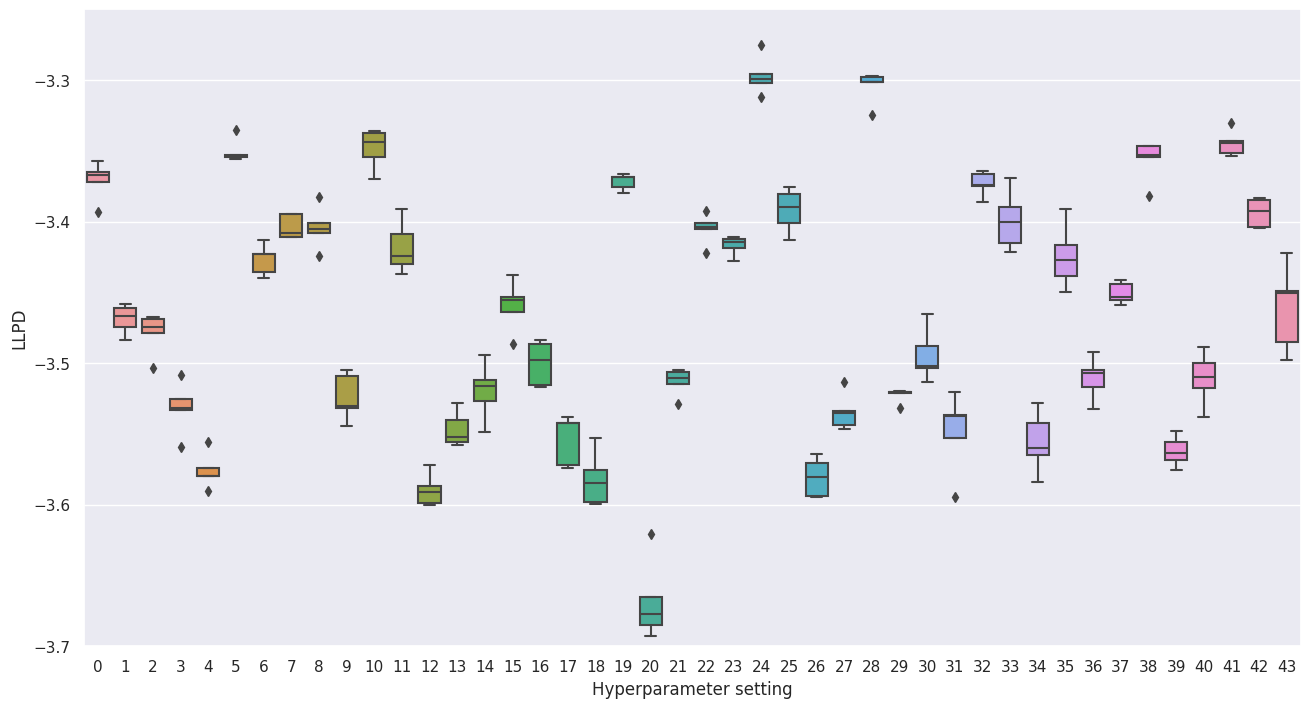

In [6]:
# Box plots showing 5 LLPD for each setting
#figfol = '../results/results_op/plots/march/'
os.makedirs(figfol, exist_ok=True)

sns.set(rc={'figure.figsize': (15.7, 8.27)})
ax = sns.boxplot(x="uid", y="llpd", data=out)

ax.set_xlabel('Hyperparameter setting')
ax.set_ylabel('LLPD')

# Set y-axis limits
ax.set_ylim(-3.70, -3.25)

# Save the figure
fig = ax.get_figure()
fig.savefig(figfol + 'compare_hyper.png', dpi=400)


In [7]:
# Select the best setting based on LLPD
final_setting = out_mean[out_mean['llpd'] == out_mean['llpd'].max()]
low_lim = final_setting['llpd'].values[0] -\
 1*final_setting['std'].values[0]/np.sqrt(5)
h_lim = final_setting['llpd'].values[0] +\
 1*final_setting['std'].values[0]/np.sqrt(5)
final_setting

,uid,Index,k,lambda,upsilon,llpd,sampleid,loglik_post,std
24,24,118.8,100.0,0.060596,0.040816,-3.296857,21.0,-3.364188,0.013475


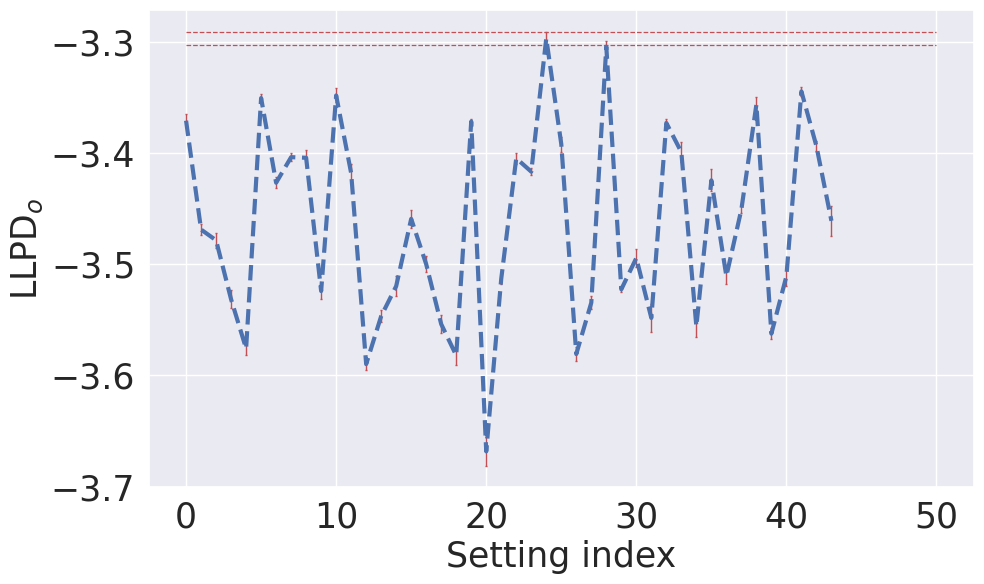

In [8]:
## Error bar plot to  evaluate each settings 
import matplotlib.pyplot as plt
sderr = out_mean['std']/np.sqrt(5)
fig, ax = plt.subplots(figsize = (10,6))
ax.errorbar(np.array(out_mean.index), out_mean['llpd'],\
            yerr=sderr, label='error plot',\
            ecolor = 'r', elinewidth = 0.99, capsize = 1, linewidth = 3,\
            linestyle = '--')
ax.tick_params(axis="x", labelsize=25)
ax.tick_params(axis="y", labelsize=25)
ax.set_xlabel('Setting index', fontsize=25)
ax.set_ylabel(r'LLPD$_o$', fontsize=25)
# ax.set_title('Hyperparameter tuning', fontsize=25)
ax.hlines(low_lim,0, 50, colors="r",linewidth = .9,linestyle = '--')
ax.hlines(h_lim,0, 50, colors="r",linewidth = .9,linestyle = '--')
fig.tight_layout()
# fig.savefig(figfol + 'hyperparam_error_plot.png',dpi = 400)
fig.savefig(figfol + 'hyperparam_error_plot.png', dpi = 400)

In [9]:
# Filter final setting based on threshold
sel_case = out_mean['llpd'] >= low_lim
print(np.sum(sel_case))
final_setting  = out_mean[sel_case]

# Print LaTeX output
print(final_setting.iloc[:, [1, 2, 3, 4]].to_latex(index=False, float_format="%.4f"))

# Dynamically save with informative filename
filename = f"selected_hyperparam_{data}_s{setting}.pkl"
csv_filename = f"selected_hyperparam_{data}_s{setting}.csv"

# Save as pickle and CSV
with open(filename, "wb") as f:
    pickle.dump(final_setting, f)
    print(f"✅ Saved hyperparameters to {filename}")

final_setting.to_csv(csv_filename, index=False)
print(f"✅ Also saved as CSV to {csv_filename}")

    

1
\begin{tabular}{rrrr}
\toprule
   Index &        k &  lambda &  upsilon \\
\midrule
118.8000 & 100.0000 &  0.0606 &   0.0408 \\
\bottomrule
\end{tabular}



OSError: [Errno 36] File name too long: 'selected_hyperparam_[array([[0., 0., 1., ..., 0., 0., 0.],\n       [0., 0., 1., ..., 0., 0., 0.],\n       [0., 0., 0., ..., 0., 0., 0.],\n       ...,\n       [0., 0., 0., ..., 0., 1., 0.],\n       [0., 0., 0., ..., 0., 0., 0.],\n       [0., 0., 0., ..., 0., 0., 0.]]), 0, 0, 0, 150, 3, 0.036215119613304037, 0.4139030612244898, 0.1, 103, 200, array([[ -0.        ,  -0.        ,  -9.95936498, ...,  -0.        ,\n         -0.        ,  -0.        ],\n       [ -0.        ,  -0.        ,  -8.48861479, ...,  -0.        ,\n         -0.        ,  -0.        ],\n       [ -0.        ,  -0.        ,  -0.        , ...,  -0.        ,\n         -0.        ,  -0.        ],\n       ...,\n       [ -0.        ,  -0.        ,  -0.        , ...,  -0.        ,\n        -11.89004077,  -0.        ],\n       [ -0.        ,  -0.        ,  -0.        , ...,  -0.        ,\n         -0.        ,  -0.        ],\n       [ -0.        ,  -0.        ,  -0.        , ...,  -0.        ,\n         -0.        ,  -0.        ]]), array([[ 0.        ,  0.        , -9.15103648, ...,  0.        ,\n         0.        ,  0.        ],\n       [ 0.        ,  0.        , -8.26354091, ...,  0.        ,\n         0.        ,  0.        ],\n       [ 0.        ,  0.        ,  0.        , ...,  0.        ,\n         0.        ,  0.        ],\n       ...,\n       [ 0.        ,  0.        ,  0.        , ...,  0.        ,\n        -9.10497747,  0.        ],\n       [ 0.        ,  0.        ,  0.        , ...,  0.        ,\n         0.        ,  0.        ],\n       [ 0.        ,  0.        ,  0.        , ...,  0.        ,\n         0.        ,  0.        ]])]_s2.pkl'

In [ ]:
"""
## Save the final selected setting 
sel_case = out_mean['llpd'] >= low_lim
print(np.sum(sel_case))
final_setting  = out_mean[sel_case]
# Latex output of setting selected
print(final_setting.iloc[:,[1,2,3,4]].to_latex(index=False,float_format="%.4f"))
#final_setting.to_csv('selected_hyperparam.csv')
pickle.dump(final_setting, open('selected_hyperparam', "wb"))
final_setting"
"""

SyntaxError: EOF while scanning triple-quoted string literal (4142553089.py, line 10)

#### Parallel coordinate plot to highlight selected setting 

In [10]:
print(out_mean)

    uid   Index      k       lambda   upsilon      llpd  sampleid  \
0     0   92.80  200.0    22.560023  0.088648 -3.370843      30.0   
1     1  107.80   80.0   105.683564  0.174745 -3.468799      17.0   
2     2   50.60   30.0  1071.542289  0.050383 -3.478428       0.0   
3     3   64.80   30.0  3000.000000  0.146046 -3.531543      23.0   
4     4   56.20   16.0     6.229449  0.461735 -3.575875      38.0   
5     5   52.40   80.0     0.021644  0.050383 -3.350527       7.0   
6     6  100.40   80.0   228.739626  0.050383 -3.426663       8.0   
7     7   95.40  150.0     8.058006  0.184311 -3.403676      19.0   
8     8   91.20   50.0     0.046846  0.461735 -3.404225      18.0   
9     9   54.80   80.0   295.882576  0.260842 -3.524083      46.0   
10   10   74.60   80.0     0.046846  0.155612 -3.348158      44.0   
11   11  109.20  100.0     0.021644  0.433036 -3.418067      14.0   
12   12   58.00   10.0   828.383292  0.423469 -3.589797      25.0   
13   13  107.40   80.0   382.73429

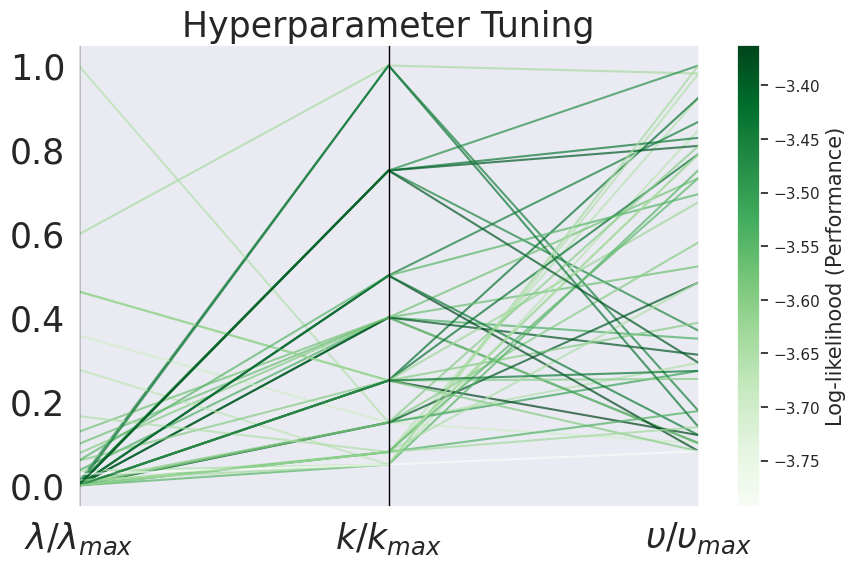

Saved plot: ./plots2/parallel_coordinate_tuning.png


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
from matplotlib.cm import ScalarMappable

# Copy the dataframe
temp_out = copy.copy(out_mean)
temp_out['uid'] = np.array(temp_out.index)
temp_out['type'] = temp_out['uid'].isin(list(final_setting.index)) + 0

if data == "original": 
    k_max = temp_out['k'].max()
else: 
    k_max = 500 
# Normalize hyperparameters
temp_out[r'$\lambda/\lambda_{max}$'] = temp_out['lambda'] / temp_out['lambda'].max()
temp_out[r'$k/k_{max}$'] = temp_out['k'] / temp_out['k'].max()
temp_out[r'$\upsilon/\upsilon_{max}$'] = temp_out['upsilon'] / temp_out['upsilon'].max()

# Use log-likelihood (loglik_post) as the performance metric for color mapping
norm = plt.Normalize(temp_out["loglik_post"].min(), temp_out["loglik_post"].max())  # Normalize log-likelihood
colors = plt.cm.Greens(norm(temp_out["loglik_post"]))  # Apply colormap

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Hyperparameter Tuning", fontsize=25)
ax.tick_params(axis="x", labelsize=25)
ax.tick_params(axis="y", labelsize=25)

# Parallel coordinates plot with color scale
pd.plotting.parallel_coordinates(
    temp_out, class_column="loglik_post", axvlines=True,
    cols=[r'$\lambda/\lambda_{max}$', r'$k/k_{max}$', r'$\upsilon/\upsilon_{max}$'],
    color=colors, alpha=0.7
)

# Remove legend with all the loglik_post values
ax.legend_.remove()

# Add colorbar to show performance scale
sm = ScalarMappable(cmap="Greens", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Log-likelihood (Performance)", fontsize=15)

# Save the plot
plot_filename = os.path.join(figfol, "parallel_coordinate_tuning.png")
plt.savefig(plot_filename, dpi=400)

plt.show()
print(f"Saved plot: {plot_filename}")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
from matplotlib.cm import ScalarMappable
import os

# Copy the dataframe to avoid modifying original
temp_out = copy.copy(out_mean)
temp_out['uid'] = np.array(temp_out.index)
temp_out['type'] = temp_out['uid'].isin(list(final_setting.index)) + 0

# Dynamically set k_max and label
if data == "original":
    k_max = temp_out['k'].max()
else:
    k_max = 500

k_label = rf'$k/k_{{{k_max}}}$'  # This will be something like $k/k_{500}$

# Normalize hyperparameters
temp_out[r'$\lambda/\lambda_{max}$'] = temp_out['lambda'] / temp_out['lambda'].max()
temp_out[k_label] = temp_out['k'] / k_max
temp_out[r'$\upsilon/\upsilon_{max}$'] = temp_out['upsilon'] / temp_out['upsilon'].max()

# Use log-likelihood (loglik_post) as the performance metric for color mapping
norm = plt.Normalize(temp_out["loglik_post"].min(), temp_out["loglik_post"].max())
colors = plt.cm.Greens(norm(temp_out["loglik_post"]))

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Hyperparameter Tuning", fontsize=25)
ax.tick_params(axis="x", labelsize=25)
ax.tick_params(axis="y", labelsize=25)

# Parallel coordinates plot with dynamic k label
pd.plotting.parallel_coordinates(
    temp_out, class_column="loglik_post", axvlines=True,
    cols=[r'$\lambda/\lambda_{max}$', k_label, r'$\upsilon/\upsilon_{max}$'],
    color=colors, alpha=0.7
)

# Remove loglik_post value legend
ax.legend_.remove()

# Add colorbar for performance scale
sm = ScalarMappable(cmap="Greens", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Log-likelihood (Performance)", fontsize=15)

# Save and show
plot_filename = os.path.join(figfol, "parallel_coordinate_tuning_new.png")
plt.savefig(plot_filename, dpi=400)
plt.show()

print(f"✅ Saved plot: {plot_filename}")


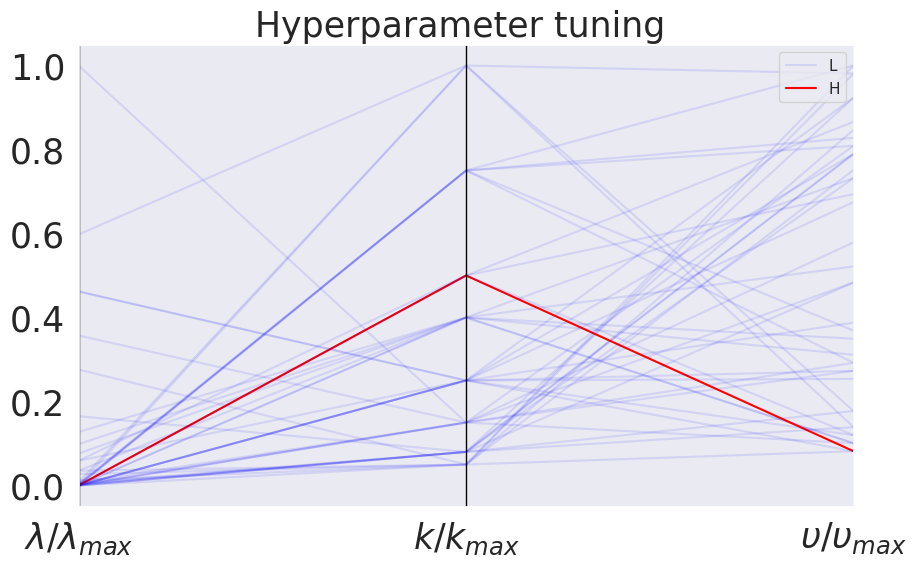

In [12]:
import copy 
temp_out = copy.copy(out_mean)
temp_out['uid'] = np.array(temp_out.index)
temp_out['type'] = temp_out['uid'].isin( list(final_setting.index)) + 0
categ = ['L', 'H']
temp_out['Indicator'] = np.array(categ)[list(temp_out['type'])]
#temp_out['Indicator'] = pd.qcut(temp_out['Log-likelihood'], 
#        q=[0, .95, 0.99, 1], labels = np.array(['L', 'M', 'H']),
#        precision=0)
temp_out[r'$\lambda/\lambda_{max}$'] = temp_out['lambda']/temp_out['lambda'].max()
temp_out[r'$k/k_{max}$'] = temp_out['k']/temp_out['k'].max()
temp_out[r'$\upsilon/\upsilon_{max}$'] = temp_out['upsilon']/temp_out['upsilon'].max()
fig, ax = plt.subplots(figsize = (10,6))
ax.set_title("Hyperparameter tuning ", fontsize=25)
ax.tick_params(axis="x", labelsize=25)
ax.tick_params(axis="y", labelsize=25)
pd.plotting.parallel_coordinates(temp_out, 'Indicator', axvlines = True,
                                 cols = [r'$\lambda/\lambda_{max}$',  r'$k/k_{max}$',r'$\upsilon/\upsilon_{max}$'],
                                 #color = ['grey', 'blue'],
                                 color = ([0,0,1,0.1], [1,0,0,1]), # , [0,1,0,0.4]
                                 sort_labels = False)           
fig.savefig(figfol + 'parallel_coordinate_I.png',dpi =  400)
# fig.savefig(figfol + 'parallel_coordinate_I.eps',dpi =  400, format = "eps")

In [27]:
import pickle
import pandas as pd
import numpy as np

# Load the selected hyperparameters
with open('selected_hyperparam', 'rb') as f:
    hyperparam_data = pickle.load(f)

# Display basic information
print("Type of data:", type(hyperparam_data))
print("\nShape of data:", hyperparam_data.shape)
print("\nColumns:", list(hyperparam_data.columns))

# Display the full contents
print("\nFull contents:")
print(hyperparam_data)

# Display summary statistics
print("\nSummary statistics:")
print(hyperparam_data.describe())

# If it's not too large, display in LaTeX format
print("\nLaTeX format:")
print(hyperparam_data.iloc[:,[1,2,3,4]].to_latex(index=False,float_format="%.4f"))

Type of data: <class 'pandas.core.frame.DataFrame'>

Shape of data: (1, 9)

Columns: ['uid', 'Index', 'k', 'lambda', 'upsilon', 'llpd', 'sampleid', 'loglik_post', 'std']

Full contents:
    uid  Index      k    lambda   upsilon     llpd  sampleid  loglik_post  \
30   30  138.8  100.0  0.060596  0.040816 -3.32728      21.0    -3.407012   

         std  
30  0.009107  

Summary statistics:
        uid  Index      k    lambda   upsilon     llpd  sampleid  loglik_post  \
count   1.0    1.0    1.0  1.000000  1.000000  1.00000       1.0     1.000000   
mean   30.0  138.8  100.0  0.060596  0.040816 -3.32728      21.0    -3.407012   
std     NaN    NaN    NaN       NaN       NaN      NaN       NaN          NaN   
min    30.0  138.8  100.0  0.060596  0.040816 -3.32728      21.0    -3.407012   
25%    30.0  138.8  100.0  0.060596  0.040816 -3.32728      21.0    -3.407012   
50%    30.0  138.8  100.0  0.060596  0.040816 -3.32728      21.0    -3.407012   
75%    30.0  138.8  100.0  0.060596  0.04